# 탐색적 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
# 음수 표시
from scipy.stats import mode


from sklearn.preprocessing import scale, minmax_scale, robust_scale
matplotlib.rc('axes', unicode_minus=False)
matplotlib.rc('font', family = 'Malgun Gothic')

### 1. 데이터 불러오기

In [2]:
# 데이터 불러오기
df_titan = pd.read_csv("C:/Users/Myung-jin/21aibigdata/bigdata/Titanic.csv")
df_titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. 데이터 특성 확인하기

### 데이터 속성 확인하기

In [3]:
df_titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df_titan.shape

(891, 12)

- 자료 수(행) 891개, 변수(열) 12개로 된 데이터셋이다. 
- Name, Sex, Ticket, Cabin, Embarked 변수는 데이터 타입이 obj로, 범주형 변수이다. 
- Pclass와 Survived는 명목형 변수인데 int 즉 연속형 변수로 인식되어있다.

In [5]:
df_titan.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- 종속변수인 Survived(생존 여부)는 값이 0과 1로만 이루어져있는데, 평균이 0.38인 것을 보아 생존하지 못한 사람이 많다는 것을 알 수 있다.
- Pclass는 1,2,3등석으로만 적혀있는데 평균이 2.3인 것을 보아 2, 3등석이 많았다고 볼 수 있다.
- Age(나이)를 보면 평균 29.76세이고 1살도 안된 어린 아이도 있었으며 최고령자는 80세까지 있다. 분포를 보면 대다수 20-30대이다.
- SibSp, Parch(함께 탑승한 형제자녀, 배우자/부모)의 경우 평균 1명이 안되는 사람들이 대다수이지만, 누구는 6명의 동반자와 함께 탑승했다.
- Fare(티켓요금)은 평균 32파운드이지만 표준편차가 크고 max가 512파운드인 것을 보아 좌석당 가격 차이가 크다는 것을 알 수 있다.

### 결측치, 이상치 확인하기

In [6]:
df_titan.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- 결측치를 확인해보니 Cabin, Embarked 변수에 결측치가 존재한다. 객실번호에 대해 결측치가 많이 존재하는 것으로 보아, 객실에 대한 조사가 매우 부족하였음을 알 수 있다.
- 결측치가 존재하는 Cabin, Embarked 변수는 범주형 변수이므로 전처리 시 최빈값으로 대체할 수 있다.

<AxesSubplot:>

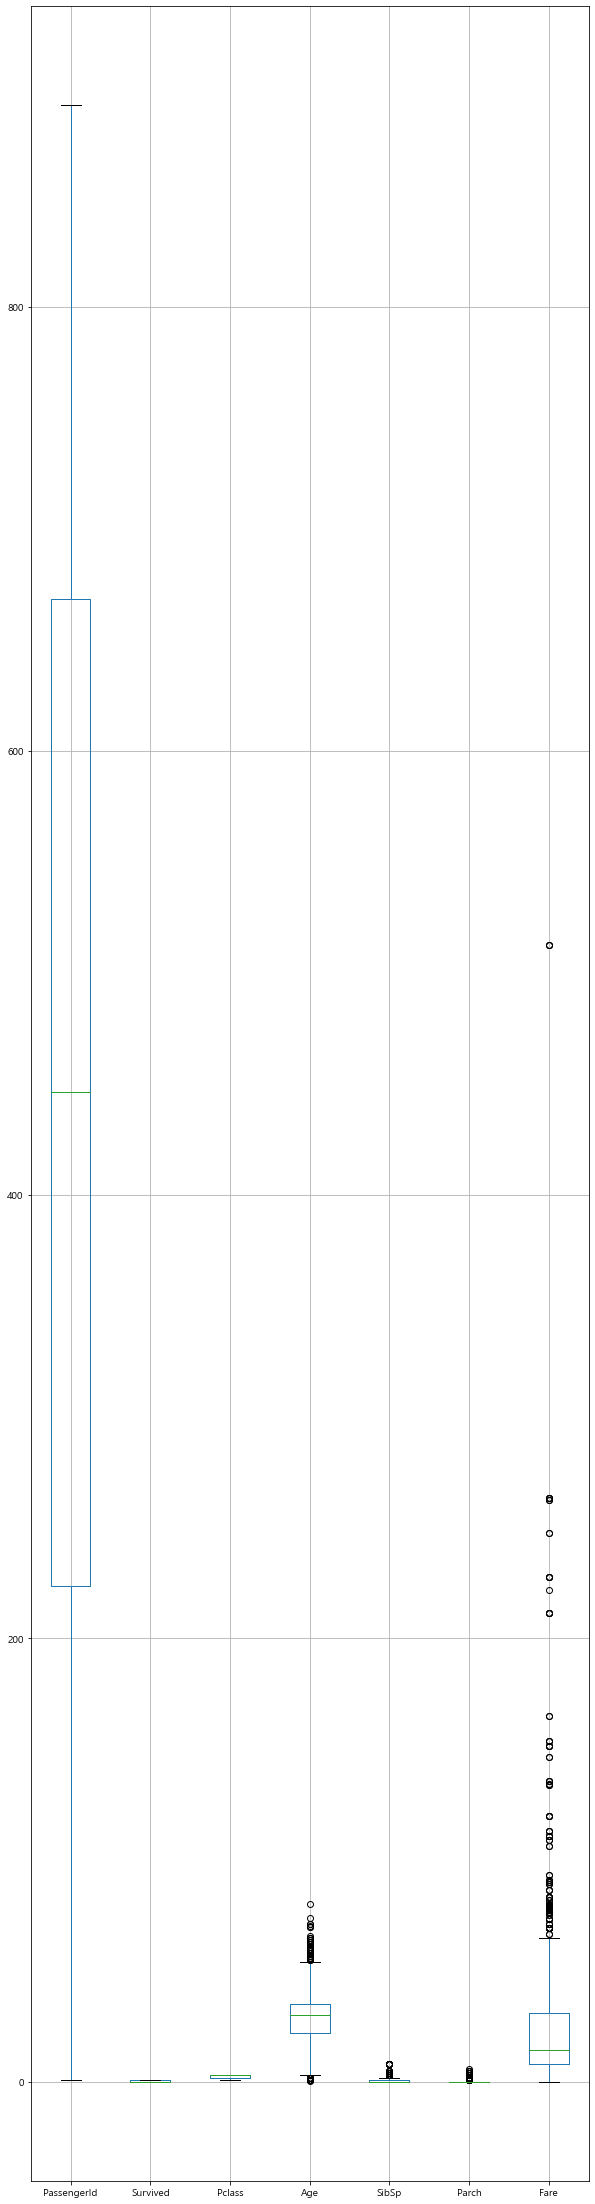

In [7]:
df_titan.boxplot(figsize = (10, 40))

- 연속형 변수에 대해 Boxplot을 통해 이상치를 확인해보니 Age, SibSp, Parch, Fare 변수에서 이상치가 존재한다. 특히, Fare, Age 부분에서 이상치가 많은 것으로 보아 승객 개개인의 티켓요금과 나이는 매우 다양한 것을 알 수 있다.

## 3. 데이터 전처리
**- 문제에서 제시한 대로 이상치는 다른 것으로 대체하지 않는다.**

### 1) 변수 데이터타입 변환
- Pclass와 Survived는 명목형 변수인데 연속형 변수로 지정되어 있으므로 형변환한다.

In [8]:
df_titan["Pclass"] = df_titan["Pclass"].astype(object)
df_titan["Survived"] = df_titan["Survived"].astype(object)

In [9]:
df_titan[["Pclass", "Survived"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Pclass    891 non-null    object
 1   Survived  891 non-null    object
dtypes: object(2)
memory usage: 14.0+ KB


### 2) 결측치 처리를 위해 변수의 평균값 또는 최빈값으로 대체
- Cabin과 Embarked는 범주형 변수이므로 결측치에 최빈값으로 대체한다.

In [10]:
df_titan[["Cabin", "Embarked"]].mode()

,Cabin,Embarked
0,B96 B98,S
1,C23 C25 C27,NaN
2,G6,NaN


- 최빈값을 확인해보니 Embarked는 S가 젤 많았지만, Cabin은 좌석번호이므로 최빈값 계산이 힘들다.   
    Cabin에 대해 첫자리만 따서 별도의 변수로 재정의할 수 있지만 편리하게 Cabin을 재정의하여 결측치에 대해 최빈값으로 대체하려고 한다.

In [11]:
df_titan[['Cabin']] = df_titan['Cabin'].str.get(i=0)
df_titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df_titan[["Cabin"]].mode()

,Cabin
0,C


- Cabin의 최빈값이 C이므로 결측치를 C로 대체한다.

In [13]:
df_titan["Cabin"].fillna("C", inplace = True)
df_titan["Embarked"].fillna("S", inplace = True)
df_titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C,S


- Cabin과 Embarked 변수의 결측치가 최빈값으로 대체되었다.
- 우려되는 부분은 Embarked 변수는 결측치가 2개여서 최빈값으로 대체되어도 크게 변동이 없지만,  
    **Cabin**의 경우 거의 900개 중 600개를 최빈값으로 대체했기에 편향성과 변동이 심할 것이다.

### 3) 파생변수 생성

#### 3-1) 가족수 계산한 변수 생성

In [14]:
# Family라는 새로운 변수를 만들고 Parch값과 SibSp 값을 더해서 넣어준다.
df_titan["Family"] = df_titan["Parch"] + df_titan["SibSp"]
df_titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C,S,0


#### 3-2) 요금 구간화

In [15]:
for i in range(891):
    if df_titan.iloc[i, 9]<= 50:
        df_titan.iloc[i, 9] = 0
    elif df_titan.iloc[i, 9]<=100:
        df_titan.iloc[i, 9] = 1
    elif df_titan.iloc[i, 9]<=200:
        df_titan.iloc[i, 9]= 3
    else : df_titan.iloc[i, 9] = 4

In [16]:
df_titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0.0,C,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,1.0,C,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,0.0,C,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,1.0,C,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,0.0,C,S,0


- 요금 구간화했기 때문에 범주형 변수에 속하므로 obj형으로 변환한다.

In [17]:
df_titan["Fare"] = df_titan["Fare"].astype(object)

#### 3-3) 나이에 대한 파생변수(Agegroup) 생성
- 14세 이하는 Child, 28세 이하는 Young, 45세 이하는 Middle, 56세 이하는 Prime, 나머지는 Old로 정의한다.

In [18]:
for i in range(891):
    if df_titan.iloc[i, 5]<= 14:
        df_titan["Agegroup"] = "Child"
    elif df_titan.iloc[i, 5]<=28:
        df_titan["Agegroup"] = "Young"
    elif df_titan.iloc[i, 5]<=45:
        df_titan["Agegroup"]= "Middle"
    elif df_titan.iloc[i, 5]<=56:
        df_titan["Agegroup"] = "Prime"
    else: df_titan["Agegroup"] = "Old"

In [19]:
df_titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Agegroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0.0,C,S,1,Middle
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,1.0,C,C,1,Middle
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,0.0,C,S,0,Middle
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,1.0,C,S,1,Middle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,0.0,C,S,0,Middle


### 4. 그래프 분석

#### 4-1) 목표변수의 빈도 수 현황 / 비율 확인

<AxesSubplot:>

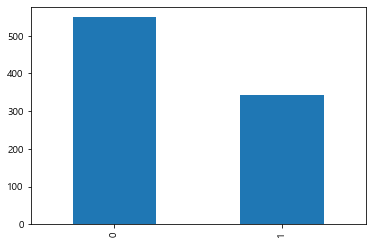

In [20]:
df_titan['Survived'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='None'>

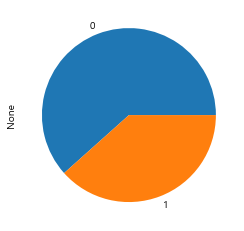

In [21]:
# 비율 
df_count = df_titan.groupby(["Survived"]).size()
df_count.plot.pie(y = "Ticket")

- 생존하지 못한 사람이 생존한 사람보다 빈도가 많은 것을 알 수 있다.

#### 4-2) 설명변수의 분포/비율 확인
**범주형 데이터의 경우, 분포는 Bar Chart, 비율은 파이 차트를 이용한다.**
- 범주형 변수에는 Name, Sex, Ticket, Cabin, Embarked, Pclass, 그리고 재정의된 Agegroup, Fare이 있는데, Name, Ticket의 경우 목표변수와 아무런 의미도 없으므로 나머지 변수에 대해서 분포를 확인하려고 한다.

##### Sex 변수

<AxesSubplot:>

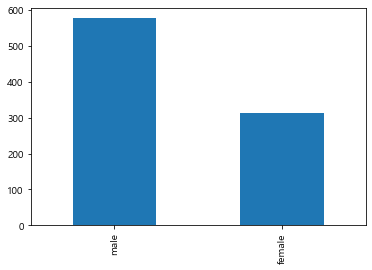

In [22]:
# 분포
df_titan['Sex'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='None'>

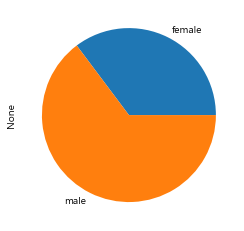

In [23]:
# 비율 
df_count = df_titan.groupby(["Sex"]).size()
df_count.plot.pie(y = "Ticket")

- 남자가 여자에 비해 월등히 많은 것을 알 수 있다.

##### Cabin 변수

<AxesSubplot:>

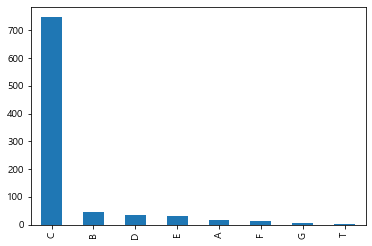

In [24]:
# 분포
df_titan['Cabin'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='None'>

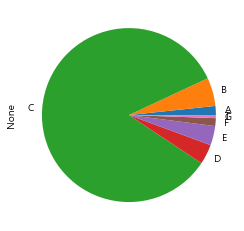

In [25]:
# 비율
df_count = df_titan.groupby(["Cabin"]).size()
df_count.plot.pie(y = "Ticket")

- 결측치를 최빈값으로 대체해서인지, Cabin 변수에서는 C의 빈도가 다른 값들에 비해 큰 차이로 높다.

##### Embarked 변수

<AxesSubplot:>

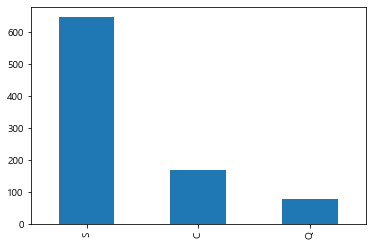

In [26]:
# 분포
df_titan['Embarked'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='None'>

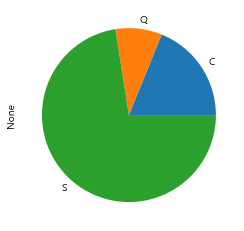

In [27]:
# 비율
df_count = df_titan.groupby(["Embarked"]).size()
df_count.plot.pie(y = "Ticket")

- 결측치를 최빈값으로 대체해서인지, Embarked 변수 역시 S의 빈도가 다른 값들에 비해 큰 차이로 높다.

##### Pclass 변수

<AxesSubplot:>

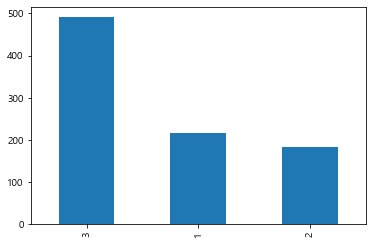

In [28]:
# 분포
df_titan['Pclass'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='None'>

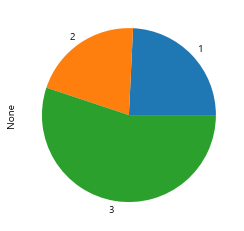

In [29]:
# 비율
df_count = df_titan.groupby(["Pclass"]).size()
df_count.plot.pie(y = "Ticket")

- Pclass를 보아 3등석에 앉은 사람의 빈도가 월등히 높고, 파이차트에서는 비슷해보이지만 분포를 보면 1등석이 2등석보다 빈도가 높은 것을 알 수 있다.

<AxesSubplot:>

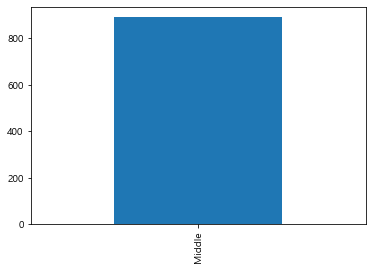

In [30]:
df_titan['Agegroup'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='None'>

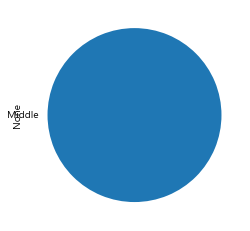

In [31]:
# 비율
df_count = df_titan.groupby(["Agegroup"]).size()
df_count.plot.pie(y = "Ticket")

- 나이대는 Middle(28세 이상 45세 이하)가 월등히 빈도가 높다. 기술통계량을 통해 age가 최소 1살 이하부터 최대 80세까지 있었는데 비율이 월등히 낮아 분포/비율 그래프로는 나타나지 않는 것 같다.

##### Fare 변수

<AxesSubplot:>

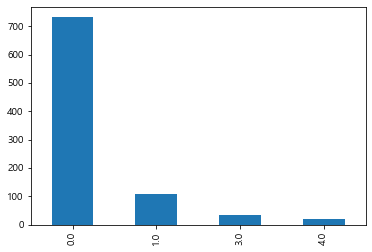

In [32]:
df_titan['Fare'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='None'>

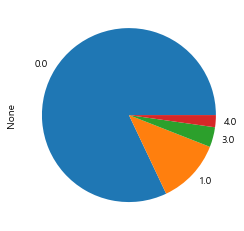

In [33]:
# 비율
df_count = df_titan.groupby(["Fare"]).size()
df_count.plot.pie(y = "Ticket")

- 요금은 50파운드 이하인 경우가 빈도가 가장 월등히 높다. 그 다음으로는 100파운드 이하의 경우가 높다.

**연속형 변수의 경우 Histogram을 이용하여 분포를 확인한다.**
- Age, Family(SibSp+Parch) 변수에 대해 분포를 확인해보자.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Family'}>]], dtype=object)

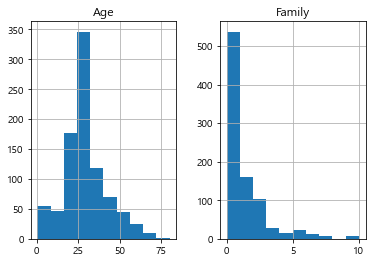

In [34]:
df_titan[["Age", "Family"]].hist()

- Age의 경우 위의 Agegroup을 통해 Middle(28세 이상 45세 이하)가 월등히 빈도가 높다는 것을 확인했는데 Age를 보면 25살 전후의 나이대가 빈도가 높다는 것을 알 수 있다.
- Family의 경우 동반자가 대다수 없이 혼자 왔다는 것을 알 수 있다.

#### 4-3) 설명변수와 목표변수의 관계에 대한 그래프 분석

In [35]:
# 설명변수 종류별로 분류
category_feature = [ col for col in df_titan.columns if df_titan[col].dtypes == "object"]
numerical_feature = list(set(df_titan.columns) - set(category_feature) - set(['PassengerId','Survived', 'SibSp', 'Parch']))

In [36]:
numerical_feature

['Age', 'Family']

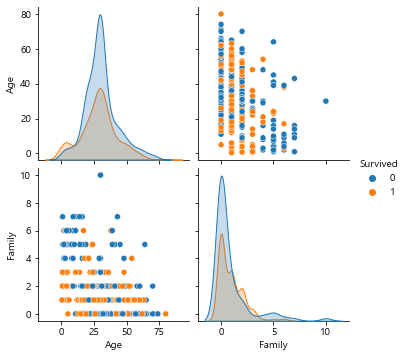

In [37]:
# 연속형 변수와 목표변수의 관계
sns.pairplot(df_titan[list(numerical_feature) + ['Survived']], hue='Survived', 
             x_vars=numerical_feature, y_vars=numerical_feature)
plt.show()

- 연속형 데이터와 목표변수간의 관계는 육안으로 보기엔 규칙성이 있다고 보기 힘들다.
- 동승자(family)가 낮을 경우 생존할 확률이 높은 경향성을 보이는 것 같다.
- 그래서 생존에 영향을 미치는 잠재 인자는 family 수라고 판단했다.